In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import csv
import datetime as dt

# Monte Carlo Simulation and Efficient Frontier
* Introduction to Monte Carlo simulation
* Applying Monte Caro Simulation on portfolios using Sharpe Ratio
* Creating Efficient Frontier based on Sharpe Ratio

In [2]:
def roll_dice():
    return np.sum(np.random.randint(1,7,2))

In [3]:
roll_dice()

6

In [4]:
def monte_carlo_simulation(runs=1000):
    results=np.zeros(2)
    for _ in range(runs):
        if roll_dice()==7:
            results[0]+=1
        else:
            results[1]+=1
    return results

In [5]:
monte_carlo_simulation()

array([173., 827.])

In [6]:
np.zeros(2)

array([0., 0.])

In [7]:
monte_carlo_simulation()

array([168., 832.])

In [8]:
178*5

890

In [9]:
results=np.zeros(1000)
for i in range(1000):
    results[i]=monte_carlo_simulation()[0]

In [10]:
results

array([188., 177., 170., 160., 163., 167., 169., 158., 158., 162., 171.,
       157., 153., 182., 164., 166., 167., 146., 167., 169., 169., 170.,
       189., 175., 173., 171., 168., 171., 162., 168., 185., 168., 160.,
       153., 186., 172., 170., 166., 162., 191., 196., 187., 171., 165.,
       169., 145., 172., 149., 166., 165., 157., 167., 153., 153., 170.,
       163., 149., 173., 164., 158., 156., 137., 154., 159., 188., 178.,
       157., 169., 174., 168., 174., 179., 173., 155., 165., 165., 167.,
       159., 177., 158., 157., 155., 170., 161., 175., 175., 158., 160.,
       170., 169., 156., 167., 188., 166., 172., 168., 182., 193., 154.,
       165., 188., 170., 165., 150., 160., 164., 155., 161., 171., 171.,
       177., 174., 165., 157., 167., 190., 184., 184., 166., 178., 141.,
       146., 163., 172., 181., 191., 144., 171., 170., 166., 167., 166.,
       180., 168., 173., 171., 168., 182., 169., 193., 182., 155., 151.,
       181., 179., 152., 164., 180., 174., 154., 16

<IPython.core.display.Javascript object>


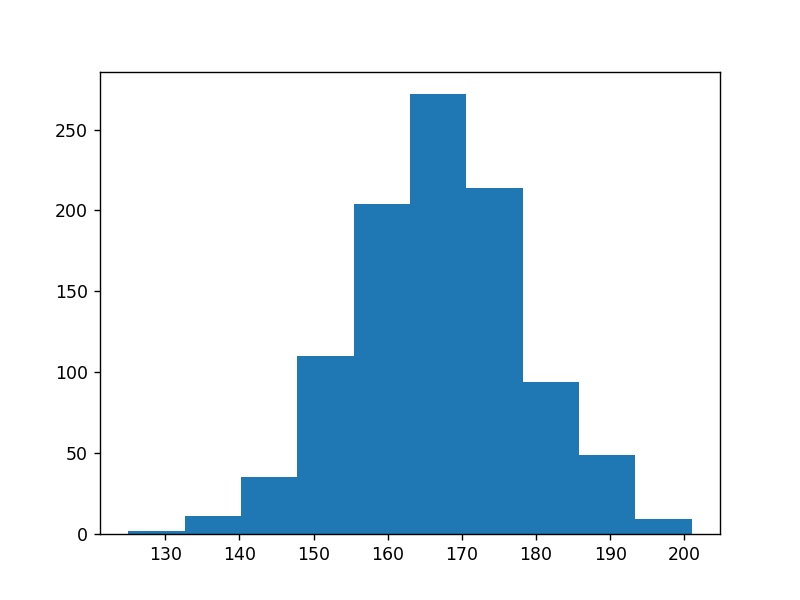

(array([  2.,  11.,  35., 110., 204., 272., 214.,  94.,  49.,   9.]),
 array([125. , 132.6, 140.2, 147.8, 155.4, 163. , 170.6, 178.2, 185.8,
        193.4, 201. ]),
 <BarContainer object of 10 artists>)

In [11]:
fig,ax=plt.subplots()
ax.hist(results)

In [12]:
results.mean()*5

833.68

In [13]:
1000-results.mean()

833.264

In [14]:
results.mean()/10000

0.0166736

In [15]:
d1=np.arange(1,7)

In [16]:
d1

array([1, 2, 3, 4, 5, 6])

In [17]:
d2=np.arange(1,7)

In [18]:
d2

array([1, 2, 3, 4, 5, 6])

In [19]:
mat=np.add.outer(d1,d2)

In [20]:
mat

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12]])

In [21]:
mat.size

36

In [22]:
mat[mat==7].size

6

In [23]:
mat[mat==7].size/mat.size

0.16666666666666666

# Monte Carlo on Portfolios

In [24]:
tickers=['AAPL','MSFT','TWTR','IBM']
start=dt.datetime(2022,1,1)

data=pdr.get_data_yahoo(tickers,start)

In [25]:
data

Attributes   Adj Close                                          Close  \
Symbols           AAPL        MSFT       TWTR         IBM        AAPL   
Date                                                                    
2021-12-31  176.838257  334.136902  43.220001  128.862701  177.570007   
2022-01-03  181.259918  332.577057  42.660000  131.157272  182.009995   
2022-01-04  178.959442  326.874359  40.849998  133.066223  179.699997   
2022-01-05  174.199158  314.326324  39.500000  133.259048  174.919998   
2022-01-06  171.291183  311.842560  39.590000  130.482407  172.000000   
...                ...         ...        ...         ...         ...   
2022-10-14  138.380005  228.559998  50.450001  120.040001  138.380005   
2022-10-17  142.410004  237.529999  50.740002  121.519997  142.410004   
2022-10-18  143.750000  238.500000  51.779999  122.940002  143.750000   
2022-10-19  143.860001  236.479996  51.830002  122.510002  143.860001   
2022-10-20  144.934998  237.990005  52.419998  127.769997  144.934998   

Attributes                                           High              ...  \
Symbols           MSFT       TWTR         IBM        AAPL        MSFT  ...   
Date                                                                   ...   
2021-12-31  336.320007  43.220001  133.660004  179.229996  339.359985  ...   
2022-01-03  334.750000  42.660000  136.039993  182.880005  338.000000  ...   
2022-01-04  329.010010  40.849998  138.020004  182.940002  335.200012  ...   
2022-01-05  316.380005  39.500000  138.220001  180.169998  326.070007  ...   
2022-01-06  313.880005  39.590000  135.339996  175.300003  318.700012  ...   
...                ...        ...         ...         ...         ...  ...   
2022-10-14  228.559998  50.450001  120.040001  144.520004  237.240005  ...   
2022-10-17  237.529999  50.740002  121.519997  142.899994  238.960007  ...   
2022-10-18  238.500000  51.779999  122.940002  146.699997  243.929993  ...   
2022-10-19  236.479996  51.830002  122.510002  144.949997  239.610001  ...   
2022-10-20  237.990005  52.419998  127.769997  145.889893  241.309998  ...   

Attributes        Low                    Open                         \
Symbols          TWTR         IBM        AAPL        MSFT       TWTR   
Date                                                                   
2021-12-31  43.180000  133.610001  178.089996  338.510010  44.340000   
2022-01-03  42.480000  133.630005  177.830002  335.350006  43.500000   
2022-01-04  40.360001  135.899994  182.630005  334.829987  42.849998   
2022-01-05  39.450001  137.880005  179.610001  325.859985  40.799999   
2022-01-06  38.689999  132.509995  172.699997  313.149994  39.500000   
...               ...         ...         ...         ...        ...   
2022-10-14  50.299999  119.839996  144.309998  235.539993  50.490002   
2022-10-17  50.200001  121.430000  141.070007  235.820007  50.500000   
2022-10-18  50.849998  121.820000  145.490005  243.240005  51.099998   
2022-10-19  51.259998  121.989998  141.690002  237.039993  51.799999   
2022-10-20  52.169998  125.150002  143.020004  235.770004  52.200001   

Attributes                   Volume                                     
Symbols            IBM         AAPL        MSFT        TWTR        IBM  
Date                                                                    
2021-12-31  134.000000   64062300.0  18000800.0   9829600.0  3362100.0  
2022-01-03  134.070007  104487900.0  28865100.0  14431900.0  4605900.0  
2022-01-04  136.100006   99310400.0  32674300.0  21422400.0  7300000.0  
2022-01-05  138.309998   94537600.0  40054300.0  22008600.0  8956900.0  
2022-01-06  138.199997   96904000.0  39646100.0  16613400.0  9908100.0  
...                ...          ...         ...         ...        ...  
2022-10-14  121.800003   88512300.0  30187200.0  10034500.0  3762400.0  
2022-10-17  121.800003   85250900.0  28142300.0  14101300.0  5458600.0  
2022-10-18  123.000000   99136600.0  26329600.0  18533900.0  5120300.0  

In [26]:
data=data['Adj Close']

In [27]:
data

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2021-12-31,176.838257,334.136902,43.220001,128.862701
2022-01-03,181.259918,332.577057,42.660000,131.157272
2022-01-04,178.959442,326.874359,40.849998,133.066223
2022-01-05,174.199158,314.326324,39.500000,133.259048
2022-01-06,171.291183,311.842560,39.590000,130.482407
...,...,...,...,...
2022-10-14,138.380005,228.559998,50.450001,120.040001
2022-10-17,142.410004,237.529999,50.740002,121.519997
2022-10-18,143.750000,238.500000,51.779999,122.940002


In [28]:
log_return=np.log(data/data.shift())

In [29]:
log_return

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2021-12-31,NaN,NaN,NaN,NaN
2022-01-03,0.024697,-0.004679,-0.013042,0.017650
2022-01-04,-0.012773,-0.017296,-0.043355,0.014450
2022-01-05,-0.026960,-0.039144,-0.033606,0.001448
2022-01-06,-0.016834,-0.007933,0.002276,-0.021057
...,...,...,...,...
2022-10-14,-0.032771,-0.024548,0.002183,-0.014473
2022-10-17,0.028707,0.038495,0.005732,0.012254
2022-10-18,0.009365,0.004075,0.020289,0.011618


In [30]:
weight=np.random.random(4)

In [31]:
weight/=weight.sum()
weight

array([0.39430276, 0.02945377, 0.13614296, 0.4401005 ])

In [32]:
exp_rtn=np.sum(log_return.mean()*weight*255)

In [33]:
exp_rtn

-0.08320976423748766

In [34]:
exp_vol=np.sqrt(np.dot(weight,np.dot(log_return.cov()*255,weight)))

In [35]:
exp_vol

0.24834574511781132

In [36]:
sharpe_ratio=exp_rtn/exp_vol

In [37]:
sharpe_ratio

-0.3350561299047594